# Preprocessing of passengersEU.csv

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
passengersEU = pd.read_csv('../data/raw/passengersEU.csv', dtype='str')
passengersEU

,name,sex,birth_date,shopped_at,business_trip,traveled_with_family,luggage,total_flighttime,total_traveltime,layover_time,amount_spent_cat,flight_number_1,departure_IATA_1,destination_IATA_1,flight_number_2,departure_IATA_2,destination_IATA_2
0,Christian Kluge,m,1977/02/28,BCN,yes,no,Sports Bag 19l,550.48,550.48,0.0,2,LH 5507,BCN,KTM,NaN,NaN,NaN
1,Bernd Jung,m,05/10/1971,MUC,no,no,Bag 19kg,1080.14,1142.6200000000001,62.48,4,AXM 2562,HGA,MUC,IBE 1195,MUC,OAK
2,Ralph Dewhirst,m,10/04/1984,HEL,no,no,Duffel Bag [31KG],371.48,371.48,0.0,2,WY 9256,HEL,MCT,NaN,NaN,NaN
3,Jan Egger,m,1973/01/21,VIE,no,no,Bag 16kg,148.88,148.88,0.0,2,MH 8130,VIE,LPL,NaN,NaN,NaN
4,Tom Probst,m,31/03/1985,FRA,yes,no,Bag (5KG),1197.7,1655.78,458.08,3,CA 6749,ZNZ,NaN,DL 7477,NaN,MEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132229,Martin Cluckey,f,15/05/1990,CDG,no,yes,Sports Bag (21kg),1000.9,1000.9,0.0,0,EY 1046,PER,CDG,NaN,NaN,NaN
132230,Florina ramona Bande,f,23/09/1983,MUC,yes,no,Bag 30L,340.52,477.6,137.08,2,KLM 7275,MSQ,MUC,QR 2983,MUC,CMN
132231,Samara Zonia,f,10/08/1971,FCO,no,no,Suitcase (9kg),671.19,746.3700000000001,75.18,1,AY 7165,CMB,FCO,EZY 3295,FCO,PRG
132232,Kizkitza Archidona,f,1993/03/22,MUC,yes,no,Bag (9kg),131.08,131.08,0.0,0,LH 8939,MUC,PMI,NaN,NaN,NaN


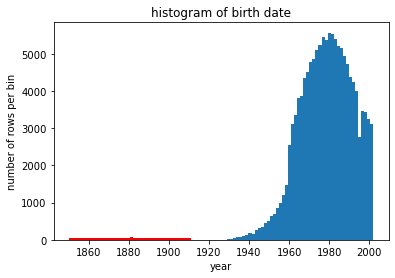

In [29]:
# histogram of birth_date
fig, ax = plt.subplots()
# ax.hist(pd.to_datetime(passengersEU['birth_date']), bins=100)
ax.set_title('histogram of birth date')
ax.set_xlabel('year')
ax.set_ylabel('number of rows per bin')

N, bins, patches = ax.hist(pd.to_datetime(passengersEU['birth_date']), bins=100)

for i in range(0,40):
    patches[i].set_facecolor('r')
# for i in range(3,5):    
#     patches[i].set_facecolor('r')
# for i in range(5, len(patches)):
#     patches[i].set_facecolor('black')


plt.savefig('./../data/results/birth_date.png', dpi=1000, transparent=True, bbox_inches='tight')

In [33]:
# number of rows where dest 1 AND dep 2 is missing
print(len(passengersEU[passengersEU['destination_IATA_1'].isna() & passengersEU['departure_IATA_2'].isna()]))

8056


## Preprocessing steps

In [ ]:
### check for row duplicates
passengersEU[passengersEU.duplicated()]
# -> no duplicates found

### transform birth_date to unified date format
passengersEU['birth_date'] =  pd.to_datetime(passengersEU['birth_date'])

### cast dtypes
passengersEU['total_flighttime'] = passengersEU['total_flighttime'].astype('float32')
passengersEU['total_traveltime'] = passengersEU['total_traveltime'].astype('float32')
passengersEU['layover_time'] = passengersEU['layover_time'].astype('float32')
passengersEU['amount_spent_cat'] = passengersEU['amount_spent_cat'].astype('category')

### upper/lower strings
passengersEU['luggage'] = passengersEU['luggage'].str.lower()
passengersEU['name'] = passengersEU['name'].str.lower()
passengersEU['shopped_at'] = passengersEU['shopped_at'].str.upper()
passengersEU['departure_IATA_1'] = passengersEU['departure_IATA_1'].str.upper()
passengersEU['destination_IATA_1'] = passengersEU['destination_IATA_1'].str.upper()
passengersEU['departure_IATA_2'] = passengersEU['departure_IATA_2'].str.upper()
passengersEU['destination_IATA_2'] = passengersEU['destination_IATA_2'].str.upper()


### make binary
passengersEU.loc[passengersEU['business_trip'] == 'no', 'business_trip'] = 0
passengersEU.loc[passengersEU['business_trip'] == 'yes', 'business_trip'] = 1

passengersEU.loc[passengersEU['traveled_with_family'] == 'no', 'traveled_with_family'] = 0
passengersEU.loc[passengersEU['traveled_with_family'] == 'yes', 'traveled_with_family'] = 1


### extract airline designator
# flight 1
passengersEU['airline_1'] = pd.Series(passengersEU['flight_number_1'].str.split(' ').str[0])

# flight 2
passengersEU['airline_2'] = pd.Series(passengersEU['flight_number_2'].str.split(' ').str[0])



### extract luggage size
# extract lbs
lbs_to_kg = 0.453592
lbs = passengersEU['luggage'].str.extract('(\d+lbs)')[0]
lbs = lbs.str.extract('(\d+)')
passengersEU['luggage_size'] = lbs.astype(float) * lbs_to_kg

# extract kg
kg = passengersEU[~passengersEU['luggage'].str.contains('lbs')]['luggage'].str.extract('(\d+kg|\d+l)')[0]
kg = kg.str.extract('(\d+)')[0].astype(float)
passengersEU['luggage_size'] = passengersEU['luggage_size'].fillna(kg)


### extract luggage type
passengersEU['luggage_type'] = pd.Series([' '.join(row[:-1]) for row in passengersEU['luggage'].str.split(' ').to_numpy()])


### flag shopping airport as start, intermediate or end
passengersEU['shopped_at_stage'] = np.NaN # default for shopping airports which are not part of flight scheme
passengersEU.loc[passengersEU['shopped_at'] == passengersEU['departure_IATA_1'], 'shopped_at_stage'] = 'start'
passengersEU.loc[(passengersEU['shopped_at'] == passengersEU['destination_IATA_2']) | 
                    ( (passengersEU['shopped_at'] == passengersEU['destination_IATA_1']) & (passengersEU['destination_IATA_2']).isna() ), 'shopped_at_stage'] = 'end'
passengersEU.loc[
    ( (passengersEU['shopped_at'] == passengersEU['destination_IATA_1']) & (~passengersEU['destination_IATA_2'].isna()) ) | 
    (passengersEU['shopped_at'] == passengersEU['departure_IATA_2']), 'shopped_at_stage'] = 'intermediate'


### drop rows with unrealistic birthdates
print(len(passengersEU[passengersEU['birth_date'] < '1920-01-01']))
passengersEU.drop(passengersEU[passengersEU['birth_date'] < '1920-01-01'].index, inplace=True)

## drop rows where shopped_at is NOT in flight scheme
not_in_flight_scheme = passengersEU[(passengersEU['shopped_at'] != passengersEU['departure_IATA_1']) &
                (passengersEU['shopped_at'] != passengersEU['destination_IATA_1']) &
                (passengersEU['shopped_at'] != passengersEU['departure_IATA_2']) &
                (passengersEU['shopped_at'] != passengersEU['destination_IATA_2'])
]
print(len(not_in_flight_scheme))
passengersEU.drop(not_in_flight_scheme.index, inplace=True)

### calculate age of passengers
passengersEU['age'] = (pd.Timestamp('2019-06-30 00:00') - passengersEU['birth_date']).astype('<m8[Y]').astype('int16')

passengersEU

2024
14144


,name,sex,birth_date,shopped_at,business_trip,traveled_with_family,luggage,total_flighttime,total_traveltime,layover_time,...,destination_IATA_1,flight_number_2,departure_IATA_2,destination_IATA_2,airline_1,airline_2,luggage_size,luggage_type,shopped_at_stage,age
0,christian kluge,m,1977-02-28,BCN,1,0,sports bag 19l,550.479980,550.479980,0.000000,...,KTM,NaN,NaN,NaN,LH,NaN,19.0,sports bag,start,42
1,bernd jung,m,1971-05-10,MUC,0,0,bag 19kg,1080.140015,1142.619995,62.480000,...,MUC,IBE 1195,MUC,OAK,AXM,IBE,19.0,bag,intermediate,48
2,ralph dewhirst,m,1984-10-04,HEL,0,0,duffel bag [31kg],371.480011,371.480011,0.000000,...,MCT,NaN,NaN,NaN,WY,NaN,31.0,duffel bag,start,34
3,jan egger,m,1973-01-21,VIE,0,0,bag 16kg,148.880005,148.880005,0.000000,...,LPL,NaN,NaN,NaN,MH,NaN,16.0,bag,start,46
5,swen zweig,m,1971-07-13,CPH,0,0,messenger bag 1kg,147.029999,147.029999,0.000000,...,MRS,NaN,NaN,NaN,AC,NaN,1.0,messenger bag,start,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132229,martin cluckey,f,1990-05-15,CDG,0,1,sports bag (21kg),1000.900024,1000.900024,0.000000,...,CDG,NaN,NaN,NaN,EY,NaN,21.0,sports bag,end,29
132230,florina ramona bande,f,1983-09-23,MUC,1,0,bag 30l,340.519989,477.600006,137.080002,...,MUC,QR 2983,MUC,CMN,KLM,QR,30.0,bag,intermediate,35
132231,samara zonia,f,1971-10-08,FCO,0,0,suitcase (9kg),671.190002,746.369995,75.180000,...,FCO,EZY 3295,FCO,PRG,AY,EZY,9.0,suitcase,intermediate,47
132232,kizkitza archidona,f,1993-03-22,MUC,1,0,bag (9kg),131.080002,131.080002,0.000000,...,PMI,NaN,NaN,NaN,LH,NaN,9.0,bag,start,26


## Further data exploration

4.000000    1261
2.000000    1257
5.000000    1254
1.000000    1236
3.000000    1225
1.360776     331
1.814368     322
0.907184     290
0.453592     287
2.267960     286
Name: luggage_size, dtype: int64

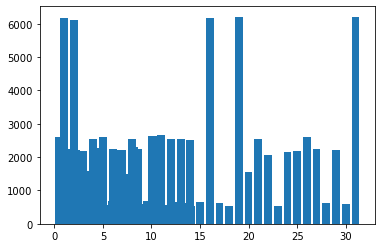

In [ ]:
### check for further data inconsistencies

# duplicates of persons
pd.DataFrame(passengersEU.groupby(['name','birth_date']).size()).sort_values(by=[0], ascending=False)
# -> one person got interviewed twice

# shopped_at in EU?
airports = pd.read_csv('../data/processed/airports.csv', index_col=0)
pd.merge(passengersEU, airports, left_on=['shopped_at'], right_on=['iata_code'], how='left')['continent'].unique()
# -> all interviews are conducted in EU

# # distribution of total_flighttime
# plt.hist(passengersEU['total_flighttime'], bins=100)
# print(passengersEU['total_flighttime'].min())
# plt.show()
# -> OK

# # distribution of layover_time
# plt.hist(passengersEU['layover_time'], bins=100)
# print(passengersEU['layover_time'].min())
# plt.show()
# -> large number of small layover time

# passengersEU[passengersEU['total_flighttime'] == 52.54999923706055]
# # airport LPL not in airports dataset

# # not joinable airports
# test = pd.merge(passengersEU, airports, left_on=['departure_IATA_1'], right_on=['iata_code'], how='left')
# test[test['continent'].isna()]

# # departure is NaN
# passengersEU[passengersEU['departure_IATA_1'].isna()]
# # -> there are cases where shopped_at is not in flight scheme

# # shopped_at NOT IN flight scheme
# passengersEU[(passengersEU['shopped_at'] != passengersEU['departure_IATA_1']) &
#                 (passengersEU['shopped_at'] != passengersEU['destination_IATA_1']) &
#                 (passengersEU['shopped_at'] != passengersEU['departure_IATA_2']) &
#                 (passengersEU['shopped_at'] != passengersEU['destination_IATA_2'])
# ]
# # -> 14.144 rows are NOT OK

# # balance?
# passengersEU['business_trip'].value_counts()
# passengersEU['traveled_with_family'].value_counts()

# layover_time
passengersEU[(passengersEU['layover_time'] <= 1) & (passengersEU['shopped_at_stage'] == 'intermediate')]
# -> OK

# luggage size
plt.bar(passengersEU['luggage_size'].unique(), passengersEU['luggage_size'].value_counts())

# luggage type
passengersEU['luggage_type'].value_counts()

passengersEU[passengersEU['luggage_type'] == 'purse']['luggage_size'].value_counts()

In [ ]:
# correlations
test = passengersEU.copy()
test['amount_spent_cat'] = test['amount_spent_cat'].astype('int16')
test.corr()

,total_flighttime,total_traveltime,layover_time,amount_spent_cat,luggage_size,age
total_flighttime,1.000000,0.950205,0.561883,0.513099,-0.003042,0.001701
total_traveltime,0.950205,1.000000,0.791686,0.629555,-0.003985,0.000379
layover_time,0.561883,0.791686,1.000000,0.665260,-0.004615,-0.002328
amount_spent_cat,0.513099,0.629555,0.665260,1.000000,0.296074,-0.007781
luggage_size,-0.003042,-0.003985,-0.004615,0.296074,1.000000,0.001251
age,0.001701,0.000379,-0.002328,-0.007781,0.001251,1.000000


In [ ]:
passengersEU['shopped_at_stage'].value_counts()

start           55429
intermediate    31433
end             29204
Name: shopped_at_stage, dtype: int64

In [ ]:
# search for duplicates
passengersEU[passengersEU.duplicated()]

# -> no duplicates found

,name,sex,birth_date,shopped_at,business_trip,traveled_with_family,luggage,total_flighttime,total_traveltime,layover_time,...,destination_IATA_1,flight_number_2,departure_IATA_2,destination_IATA_2,airline_1,airline_2,luggage_size,luggage_type,shopped_at_stage,age


In [ ]:
### investigate luggage

# unit types
passengersEU['luggage'].str.split('\d+').str[1].unique() # kg, l, lbs

array(['l', 'kg', 'kg]', 'lbs', 'l]', 'kg)', 'lbs]', 'l)', 'lbs)'],
      dtype=object)

m    58314
f    57752
Name: sex, dtype: int64


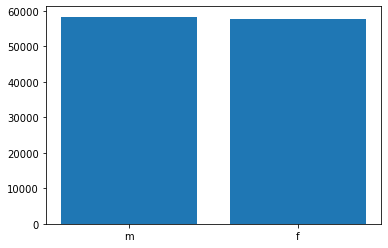

In [ ]:
# proportion of sex
print(passengersEU['sex'].value_counts())
plt.bar(x=passengersEU['sex'].value_counts().index, height=passengersEU['sex'].value_counts())
plt.show()

ATH    5572
MUC    5569
PMI    5510
FRA    5386
BCN    5374
ARN    5371
MXP    5337
CPH    5320
MAN    5308
HEL    5299
BRU    5297
LHR    5264
AMS    5240
VIE    5235
FCO    5232
OSL    5232
CDG    5227
ZRH    5155
STR    5138
DUB    5043
DUS    5014
TXL    4943
Name: shopped_at, dtype: int64


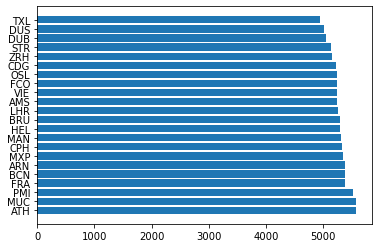

In [ ]:
# proportion of shopped_at
print(passengersEU['shopped_at'].value_counts())
plt.barh(y=passengersEU['shopped_at'].value_counts().index, width=passengersEU['shopped_at'].value_counts())
plt.show()

0    36803
2    27616
1    20661
3    18039
4    12947
Name: amount_spent_cat, dtype: int64


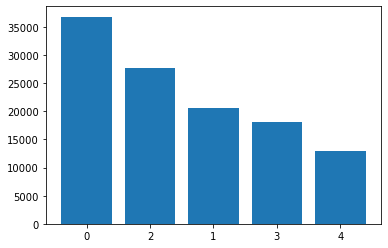

In [ ]:
# proportion of amout_spent_cat
print(passengersEU['amount_spent_cat'].value_counts())
plt.bar(x=passengersEU['amount_spent_cat'].value_counts().index, height=passengersEU['amount_spent_cat'].value_counts())
plt.show()

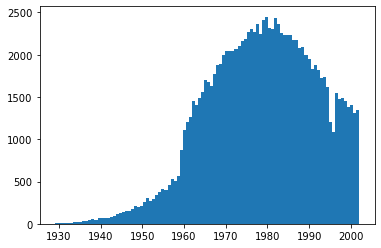

In [ ]:
plt.hist(passengersEU['birth_date'], bins=100)
plt.show()

In [ ]:
passengersEU[(passengersEU['business_trip'] == 'yes') & (passengersEU['traveled_with_family'] == 'yes')]
# business trip == yes & traveled with family == yes not found
# -> dependent variables

,name,sex,birth_date,shopped_at,business_trip,traveled_with_family,luggage,total_flighttime,total_traveltime,layover_time,...,destination_IATA_1,flight_number_2,departure_IATA_2,destination_IATA_2,airline_1,airline_2,luggage_size,luggage_type,shopped_at_stage,age


In [ ]:
# check if total_traveltime is sum of flighttime and layover time
passengersEU[passengersEU['total_traveltime'] - (passengersEU['total_flighttime'] + passengersEU['layover_time']) > 1]
# -> no row with deviation larger than 1min

,name,sex,birth_date,shopped_at,business_trip,traveled_with_family,luggage,total_flighttime,total_traveltime,layover_time,...,destination_IATA_1,flight_number_2,departure_IATA_2,destination_IATA_2,airline_1,airline_2,luggage_size,luggage_type,shopped_at_stage,age


In [ ]:
### investigate flight schema + location of shopping/questionnaire

# do people buy stuff when no layover time exists?
passengersEU[passengersEU['layover_time'] == 0].describe(include='all')
# -> yes, apparently people can buy in dep 1, dest 1/dep 2 or dest 2 airport

# is end of flight 1 = start of flight 2 always?
passengersEU[
    (passengersEU['destination_IATA_1'] != passengersEU['departure_IATA_2'])
]
# -> dest 1 and dep 2 never deviate from each other

passengersEU[passengersEU['destination_IATA_1'].isna()]['departure_IATA_2'].unique()
# -> if dest 1 = NaN, than dep 2 = NaN as well

passengersEU[passengersEU['destination_IATA_1'].isna() & passengersEU['destination_IATA_2'].isna()]
# -> when dest 1 and dep 2 = NaN, than is dest 2 NOT NaN

passengersEU[passengersEU['flight_number_1'].isna() == passengersEU['flight_number_2']]
# -> generally holds: flight number 1 != flight number 2

# are there cases where shopping airport is neither dep 1 nor dest 1/dep2 nor dest 2?
passengersEU[
    (passengersEU['shopped_at'] != passengersEU['departure_IATA_1']) &
    (passengersEU['shopped_at'] != passengersEU['destination_IATA_1']) &
    (passengersEU['shopped_at'] != passengersEU['departure_IATA_2']) &
    (passengersEU['shopped_at'] != passengersEU['destination_IATA_2'])
] #'destination_IATA_1','departure_IATA_2','destination_IATA_2'
# -> no, at least one of the airports in the flight scheme is matching with shopping airport

<ipython-input-59-68732383f89f>:4: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  passengersEU[passengersEU['layover_time'] == 0].describe(include='all')


,name,sex,birth_date,shopped_at,business_trip,traveled_with_family,luggage,total_flighttime,total_traveltime,layover_time,...,destination_IATA_1,flight_number_2,departure_IATA_2,destination_IATA_2,airline_1,airline_2,luggage_size,luggage_type,shopped_at_stage,age


In [ ]:
passengersEU.describe(include='all')

<ipython-input-60-4297d6ddb6ce>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  passengersEU.describe(include='all')


,name,sex,birth_date,shopped_at,business_trip,traveled_with_family,luggage,total_flighttime,total_traveltime,layover_time,...,destination_IATA_1,flight_number_2,departure_IATA_2,destination_IATA_2,airline_1,airline_2,luggage_size,luggage_type,shopped_at_stage,age
count,116066,116066,116066,116066,116066.0,116066.0,116066,116066.000000,116066.000000,116066.000000,...,116066,31433,31433,31433,116066,31433,116066.000000,116066,116066,116066.000000
unique,103540,2,19874,22,2.0,2.0,1629,NaN,NaN,NaN,...,192,9954,22,192,47,47,NaN,10,3,NaN
top,michael schwartz,m,1982-03-17 00:00:00,ATH,0.0,0.0,cosmetic case 2kg,NaN,NaN,NaN,...,PMI,MS 4819,ATH,MEL,EW,LH,NaN,bag,start,NaN
freq,7,58314,20,5572,74772.0,93539.0,342,NaN,NaN,NaN,...,3290,24,1570,456,2689,835,NaN,20744,55429,NaN
first,NaN,NaN,1929-01-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2001-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,511.229919,590.672058,79.441895,...,NaN,NaN,NaN,NaN,NaN,NaN,11.590220,NaN,NaN,40.289740
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,302.291473,409.310883,154.214294,...,NaN,NaN,NaN,NaN,NaN,NaN,9.056101,NaN,NaN,12.944938
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.549999,52.549999,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.453592,NaN,NaN,17.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,208.630005,208.630005,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,30.000000


(-0.5, 4.5, 0.0, 2000.0)

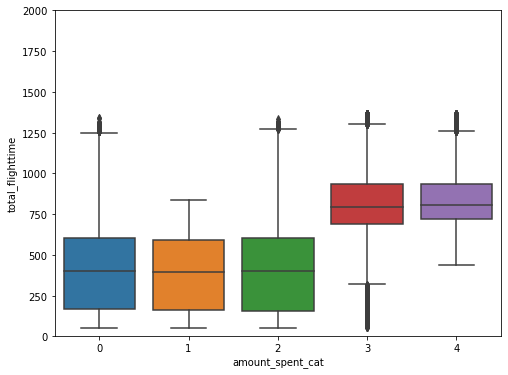

In [ ]:
# box plot amount_spent_cat/total_flighttime
var = 'amount_spent_cat'
data = pd.concat([passengersEU['total_flighttime'], passengersEU[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="total_flighttime", data=data)
fig.axis(ymin=0, ymax=2000)

(-0.5, 4.5, -10.0, 40.0)

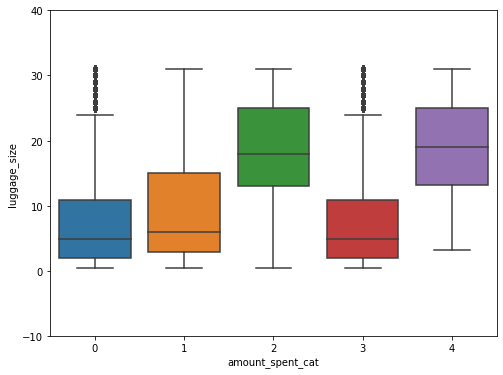

In [ ]:
# box plot amount_spent_cat/luggage_size
var = 'amount_spent_cat'
data = pd.concat([passengersEU['luggage_size'], passengersEU[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="luggage_size", data=data)
fig.axis(ymin=-10, ymax=40)

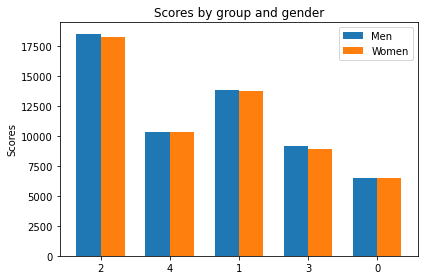

In [ ]:
# count men/women per amount_spent_cat
x = np.arange(len(passengersEU['amount_spent_cat'].unique()))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, passengersEU[passengersEU['sex'] == 'm'].groupby(['amount_spent_cat']).size(), width, label='Men')
rects2 = ax.bar(x + width/2, passengersEU[passengersEU['sex'] == 'f'].groupby(['amount_spent_cat']).size(), width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(passengersEU['amount_spent_cat'].unique())
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
# #correlation matrix
# corrmat = passengersEU.corr()
# f, ax = plt.subplots(figsize=(12, 9))
# sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
# count rows per airport
passengersEU.groupby(['shopped_at']).size()
# -> almost balanced distrubuted

shopped_at
AMS    5240
ARN    5371
ATH    5572
BCN    5374
BRU    5297
CDG    5227
CPH    5320
DUB    5043
DUS    5014
FCO    5232
FRA    5386
HEL    5299
LHR    5264
MAN    5308
MUC    5569
MXP    5337
OSL    5232
PMI    5510
STR    5138
TXL    4943
VIE    5235
ZRH    5155
dtype: int64

In [ ]:
# save processed data
passengersEU.to_csv('../data/processed/passengersEU.csv')